In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
import prepare
import acquire

In [4]:
train,val,test=prepare.wrangle_zillow()

In [7]:
train.shape,val.shape,test.shape

((1038959, 7), (445269, 7), (371057, 7))

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038959 entries, 10057 to 843328
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Bedrooms    1038959 non-null  float64
 1   Bathrooms   1038959 non-null  float64
 2   Squarefeet  1038959 non-null  float64
 3   TaxesTotal  1038959 non-null  float64
 4   Year        1038959 non-null  float64
 5   Taxes       1038959 non-null  float64
 6   Fips        1038959 non-null  object 
dtypes: float64(6), object(1)
memory usage: 63.4+ MB


# Scaling Numeric Data

# Exercises

Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

1)Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

2)Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

3)Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

4)Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

5)Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

# 1)Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .


In [10]:
# make, fit, use:
columns_to_scale = ['Bedrooms', 'Bathrooms','Taxes']
# make the object, put it into the variable scaler
scaler = MinMaxScaler()
# fit the object to my data:
train[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

Text(0, 0.5, 'Count')

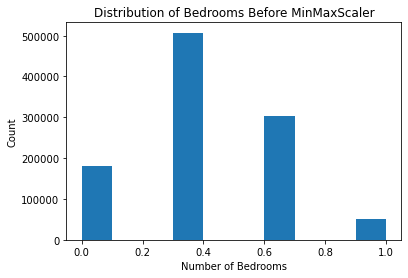

In [11]:
plt.hist(train.Bedrooms)
plt.title('Distribution of Bedrooms Before MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

# 2)Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?



In [13]:
scaler = MinMaxScaler()
original_data = train[['Taxes']]
scaled_data = scaler.fit_transform(original_data)

In [15]:
original_data[:]

,Taxes
10057,0.239843
2004970,0.159469
306031,0.124610
1038595,0.181516
270959,0.511229
...,...
991122,0.314958
1707759,0.139356
1770246,0.194752
1500741,0.626548


In [16]:
scaler.inverse_transform(scaled_data)[:]

array([[0.23984259],
       [0.15946863],
       [0.1246097 ],
       ...,
       [0.19475238],
       [0.6265484 ],
       [0.34212152]])

# 3)Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.



In [19]:
scaler = QuantileTransformer(output_distribution='normal')
train[['Bedrooms', 'Bathrooms','Taxes']] = scaler.fit_transform(train[['Bedrooms', 'Bathrooms','Taxes']])

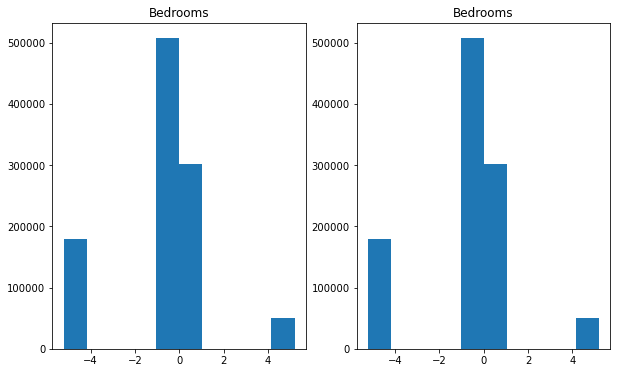

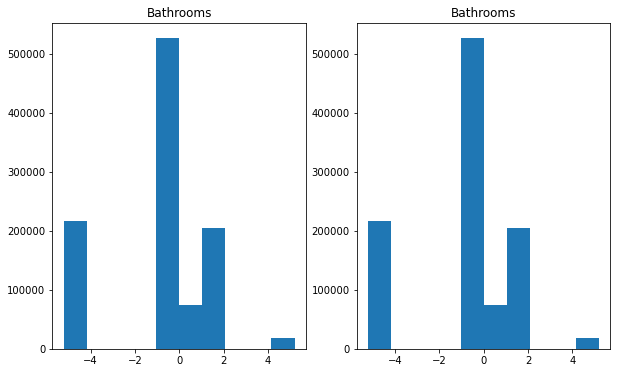

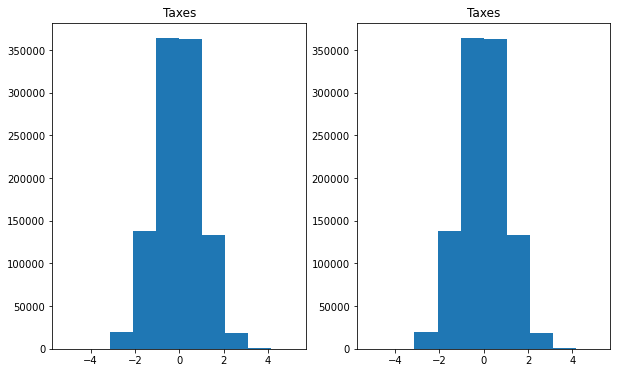

In [21]:
cols = ['Bedrooms', 'Bathrooms','Taxes']

for col in cols:
    plt.figure(figsize=(10,6))
    plt.subplot(1, 2, 1)
    plt.title(col)
    plt.hist(train[col])
    
    plt.subplot(1,2,2)
    plt.title(col)
    plt.hist(train[col])

# 4)Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?



In [22]:
scaler = QuantileTransformer(output_distribution='uniform')
train[['Bedrooms', 'Bathrooms','Taxes']] = scaler.fit_transform(train[['Bedrooms', 'Bathrooms','Taxes']])

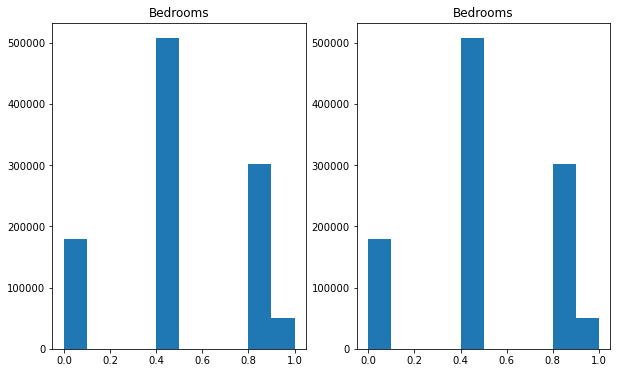

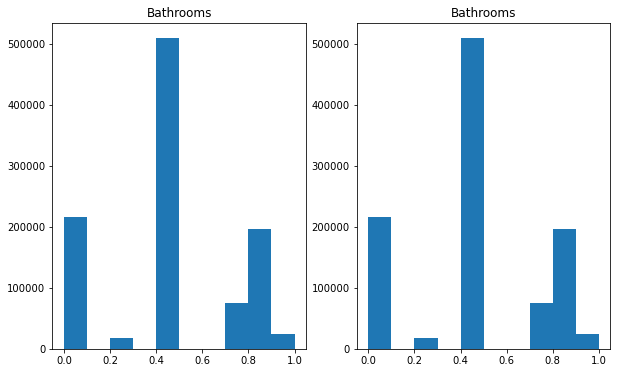

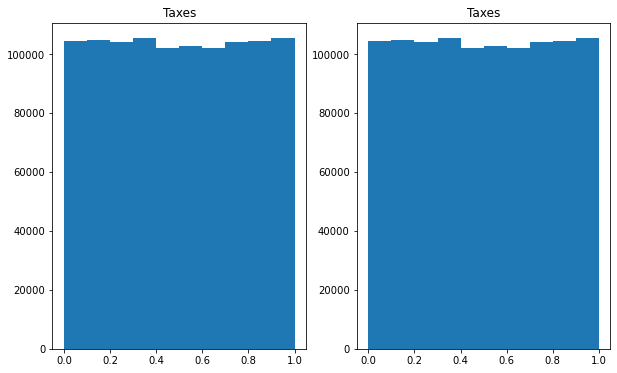

In [23]:
cols = ['Bedrooms', 'Bathrooms','Taxes']

for col in cols:
    plt.figure(figsize=(10,6))
    plt.subplot(1, 2, 1)
    plt.title(col)
    plt.hist(train[col])
    
    plt.subplot(1,2,2)
    plt.title(col)
    plt.hist(train[col])

# 5)Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [28]:
def vis_scaler (scaler, df, cols_to_scale, bins=10):
    fig, axs = plt.subplots(len(cols_to_scale),2,figsize=(16,9))
    df_scaled = df.copy()
    df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
    for (ax1, ax2), col in zip(axs, cols_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling', xlabel=col, ylabel='count')
    plt.tight_layout()
    
cols_to_scale = ['Bedrooms', 'Bathrooms','TaxesTotal']

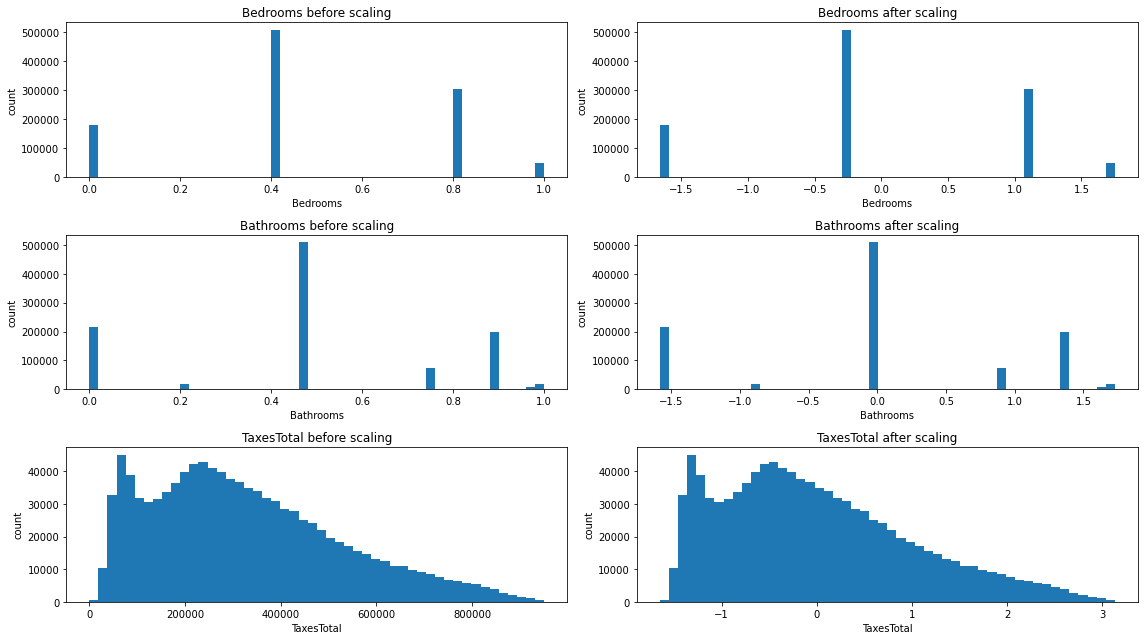

In [29]:
vis_scaler(scaler=StandardScaler(), df=train, cols_to_scale=cols_to_scale, bins=50)

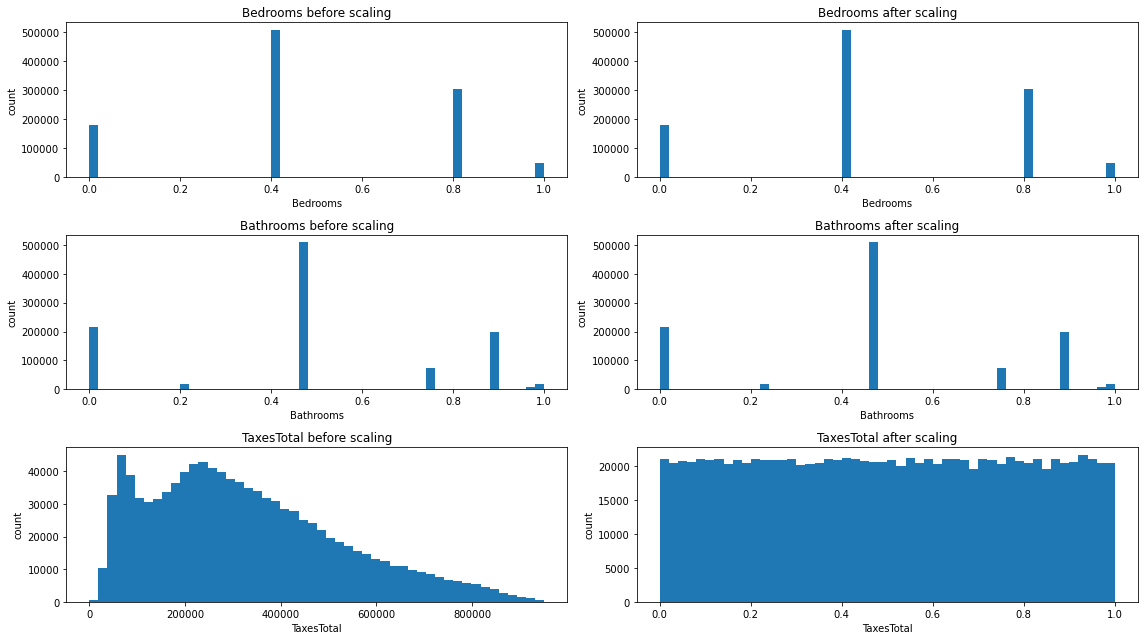

In [30]:
vis_scaler(scaler=QuantileTransformer(), df=train, cols_to_scale=cols_to_scale, bins=50)